# Pypcd

Handling 3d .pcd files with python. The point cloud library develops its own format called **PCD** (Point Cloud Data). Details can be found [here](http://pointclouds.org/documentation/tutorials/pcd_file_format.php).

If I want to process the 3d data stored in pcd with python I have got two options:
1. Build python-pcl which has to be linked to a PCL version because it is a wrapper for the point cloud library  or
2. use the Pypi package **pypcd** which can read pcd, make the data available as a numpy array and from there write to a .pcd file again.

Like the post title already says I am going to explain how to use pypcd step by step in the following few lines of code.

In [ ]:
# Install pypcd for the current python version of the kernel
import sys
!{sys.executable} -m pip install --user pypcd

In [6]:
# Import the package and print the current version
import pypcd
print(pypcd.__version__)

0.1.1


## PCD format

The pcd file format as described [here](http://pointclouds.org/documentation/tutorials/pcd_file_format.php) looks like the following:

```
# .PCD v.7 - Point Cloud Data file format
VERSION .7
FIELDS x y z rgb
SIZE 4 4 4 4
TYPE F F F F
COUNT 1 1 1 1
WIDTH 213
HEIGHT 1
VIEWPOINT 0 0 0 1 0 0 0
POINTS 213
DATA ascii
0.93773 0.33763 0 4.2108e+06
0.90805 0.35641 0 4.2108e+06
0.81915 0.32 0 4.2108e+06
0.97192 0.278 0 4.2108e+06
0.944 0.29474 0 4.2108e+06
0.98111 0.24247 0 4.2108e+06
0.93655 0.26143 0 4.2108e+06
0.91631 0.27442 0 4.2108e+06
[...]
```

In the current directory the file **cloud.pcd** contains an example of such a cloud.

In [15]:
# load cloud.pcd
cloud = pypcd.PointCloud.from_path('cloud.pcd')

In [21]:
# fancy: import pretty print to visualize dicts better
import pprint
# pretty print the meta data of the PCD
pprint.pprint(cloud.get_metadata())

{'count': [1, 1, 1, 1],
 'data': 'ascii',
 'fields': ['x', 'y', 'z', 'rgb'],
 'height': 1,
 'points': 213,
 'size': [4, 4, 4, 4],
 'type': ['F', 'F', 'F', 'F'],
 'version': '.7',
 'viewpoint': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'width': 213}


- *count* stands for the number of dimensions for every field (for example the x field only consists of one number -> only one dimension)
- *data* describes the way the points are stored. There are the options ascii (which we use in this post) and binary compressed
- *height*: if set to **1** the loaded point cloud is *unorganized*. Else the pointcloud is organized 3d-row by 3d-row (and height is the number of rows)
- *points*: the number of points/rows in the file
- *size*: the number of bytes for every column (example column x needs 4 bytes to store unsigned int/int/float)
- *type*: as which data type should the column be interpreted? F = float, u = unsigned types (uchar, ushort, uint), I = integer (int8 char, int16 short, int32 int)
- *version*: PCL version
- *viewpoint*: the position and orientation of the camera
- *width*: if cloud is not organized then width=points else width is the total number of points in a row

In [60]:
# access the point cloud as a numpy structured array
# print the first 10 rows
cloud.pc_data[:10]

array([(0.93773, 0.33763, 0., 4210800.), (0.90805, 0.35641, 0., 4210800.),
       (0.81915, 0.32   , 0., 4210800.), (0.97192, 0.278  , 0., 4210800.),
       (0.944  , 0.29474, 0., 4210800.), (0.98111, 0.24247, 0., 4210800.),
       (0.93655, 0.26143, 0., 4210800.), (0.91631, 0.27442, 0., 4210800.),
       (0.81921, 0.29315, 0., 4210800.), (0.90701, 0.24109, 0., 4210800.)],
      dtype=[('x', '<f4'), ('y', '<f4'), ('z', '<f4'), ('rgb', '<f4')])

In [61]:
# only access a specific column (here the z-column)
print(cloud.pc_data['z'])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [62]:
# Aha! Obviously the z-column of this file is not really necessary.
# Let's create a copy of the loaded cloud
new_cloud_data = cloud.pc_data.copy()

# we need numpy now
import numpy as np

# convert the structured numpy array to a ndarray
new_cloud_data = cloud.pc_data.view(np.float32).reshape(cloud.pc_data.shape + (-1,))

# print the shape of the new array
print(new_cloud_data.shape)

# print the first 10 rows
print(new_cloud_data[:10])

(213, 4)
[[9.3773e-01 3.3763e-01 0.0000e+00 4.2108e+06]
 [9.0805e-01 3.5641e-01 0.0000e+00 4.2108e+06]
 [8.1915e-01 3.2000e-01 0.0000e+00 4.2108e+06]
 [9.7192e-01 2.7800e-01 0.0000e+00 4.2108e+06]
 [9.4400e-01 2.9474e-01 0.0000e+00 4.2108e+06]
 [9.8111e-01 2.4247e-01 0.0000e+00 4.2108e+06]
 [9.3655e-01 2.6143e-01 0.0000e+00 4.2108e+06]
 [9.1631e-01 2.7442e-01 0.0000e+00 4.2108e+06]
 [8.1921e-01 2.9315e-01 0.0000e+00 4.2108e+06]
 [9.0701e-01 2.4109e-01 0.0000e+00 4.2108e+06]]


In [ ]:
# That looks good! Now we can delete the z-column and rgb-column.
# Because for the first step we don't need them.
new_cloud_data = np.delete(new_cloud_data, [2, 3], axis=1)

# output the first 10 rows of the new ndarray data
new_cloud_data[:10]

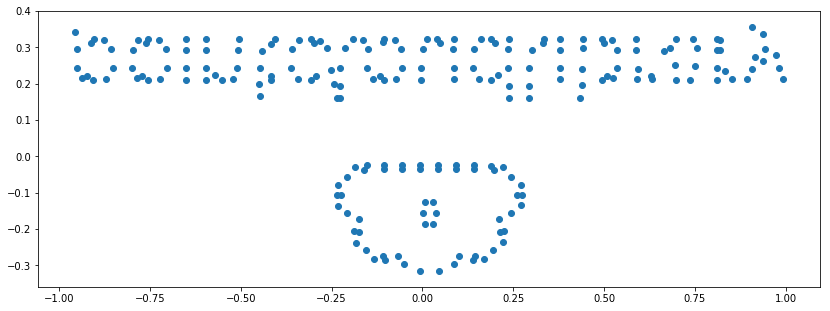

In [297]:
%matplotlib inline

# Now visualize the points with matplotlib
import matplotlib.pyplot as plt

# set the size of pyplot charts
plt.rcParams['figure.figsize'] = (14, 6)

# plot the points of the columns
plt.scatter(new_cloud_data[:, [0]], new_cloud_data[:, [1]])

# scale the axis equally 
# (Note: append a semicolon to your last line to prevent jupyter notebook 
# from outputting your last cell's content)
plt.axis('scaled');

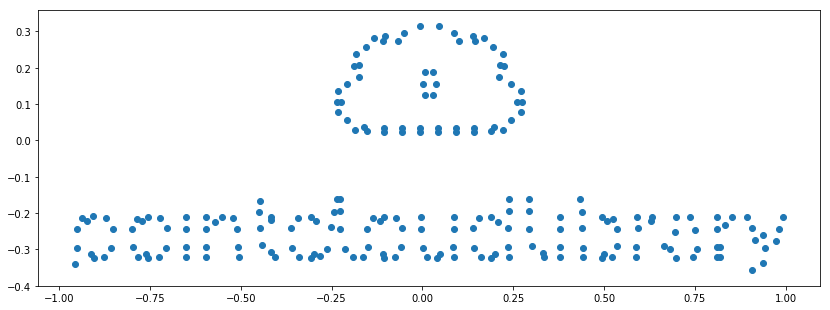

In [298]:
# Aha! It's the point cloud logo. But we have to flip it horizontally
# A minus applied to the y-data should be enough.
plt.scatter(new_cloud_data[:, [0]], -new_cloud_data[:, [1]])
plt.axis('scaled');

In [125]:
# So far so good. But what about the rgb column?
# How to access the stored color values?

# First of all we get all columns again
new_cloud_data = cloud.pc_data.view(np.float32).reshape(cloud.pc_data.shape + (-1,))

# And print some sample form the rgb column
print(new_cloud_data[:100, [3]]).reshape(1, -1)

[[4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800.
  4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800.
  4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800.
  4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800.
  4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800.
  4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800. 4210800.
  4808000. 4210800. 4210800. 4210800. 4210800. 4808000. 4210800. 4808000.
  4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000.
  4808000. 4808000. 4808000. 4210800. 4210800. 4808000. 4210800. 4808000.
  4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000.
  4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000.
  4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000. 4808000.
  4808000. 4808000. 4808000. 4808000.]]


---------------

*Info:*

The PCL stores rgb in packed 32 bit floats. Pypcd comes with a method called `decode_rgb_from_pcl` which takes a cloud as input, searches for a field called "rgb" and splits the values accordingly to three new columns of type uint8.

Of course there is also an "inverse" to this operation called `encode_rgb_for_pcl`.

--------------

In [294]:
# split the rgb column into three columns: red, green and blue
rgb_columns = pypcd.decode_rgb_from_pcl(cloud.pc_data['rgb'])

# normalize the rgb values (they should be between [0, 1])
rgb_columns = (rgb_columns / 255.0).astype(np.float)

# Let's check the values...
print(rgb_columns[:5])

[[0.50196078 0.50196078 0.87843137]
 [0.50196078 0.50196078 0.87843137]
 [0.50196078 0.50196078 0.87843137]
 [0.50196078 0.50196078 0.87843137]
 [0.50196078 0.50196078 0.87843137]]


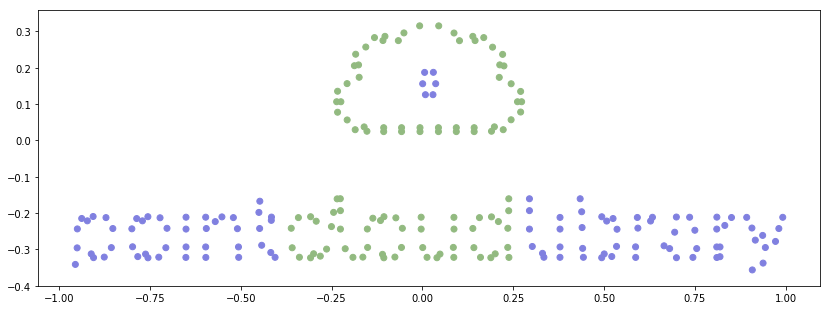

In [295]:
# Plot again with color
plt.scatter(new_cloud_data[:, [0]], -new_cloud_data[:, [1]], color=rgb_columns)
plt.axis('scaled');

## Generate a new point cloud

Now that we have seen how to load, alter and visualize in 2d, I am going to create a synthetic data set, visualize it in 3d and then save the file to disk.

In [276]:
# generate a 3d data set containing waves like the sea
# more or less ;)

# generate a grid of numbers for x and y
x = np.linspace(-10, 10, num=100)
z = np.linspace(-10, 10, num=100)
xx, zz = np.meshgrid(x, z)

# calculate "waves" for the grid
yy = np.sin(xx) + np.cos(zz) + 3

xx = xx.astype(np.float32).reshape(1, -1)
yy = yy.astype(np.float32).reshape(1, -1)
zz = zz.astype(np.float32).reshape(1, -2)

# the number of points
n = yy.size

# Generate different blue values depending on the y value
blue = (yy/np.max(yy))
# Make rgb columns for every point
rgb = np.hstack((np.repeat(0.01, n)[:, np.newaxis], np.repeat(0.01, n)[:, np.newaxis], blue.T))

# peek into the data
print(rgb[:10])

[[0.01       0.01       0.54140681]
 [0.01       0.01       0.50549465]
 [0.01       0.01       0.46661434]
 [0.01       0.01       0.42634723]
 [0.01       0.01       0.38633114]
 [0.01       0.01       0.34819368]
 [0.01       0.01       0.31348598]
 [0.01       0.01       0.28361979]
 [0.01       0.01       0.25980985]
 [0.01       0.01       0.24302459]]


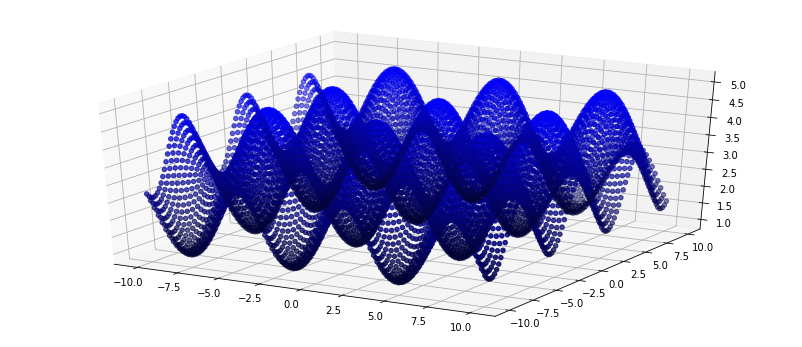

In [299]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure with a subplot with three axes
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(xx, zz, yy, color=rgb);

In [292]:
# The new points will be stored in a pcd file

# encode the colors (distinct red, green and blue color columns => one single column) 
encoded_colors = pypcd.encode_rgb_for_pcl((rgb * 255).astype(np.uint8))

# hstack the X, Y, Z, RGB columns
new_data = np.hstack((xx.T, yy.T, zz.T, encoded_colors[:, np.newaxis]))

# Use the pypcd utility function to create a new point cloud from ndarray
new_cloud = pypcd.make_xyz_rgb_point_cloud(new_data)

# pretty print the new metadata
pprint.pprint(new_cloud.get_metadata())

{'count': [1, 1, 1, 1],
 'data': 'binary',
 'fields': ['x', 'y', 'z', 'rgb'],
 'height': 1,
 'points': 10000,
 'size': [4, 4, 4, 4],
 'type': ['F', 'F', 'F', 'F'],
 'version': 0.7,
 'viewpoint': [0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0],
 'width': 10000}


In [293]:
# Store the cloud uncompressed
new_cloud.save('new_cloud.pcd')

`ls -la` in the directory says that the file was created. `less new_cloud.pcd`:

```
VERSION 0.7
FIELDS x y z rgb
SIZE 4 4 4 4
TYPE F F F F
COUNT 1 1 1 1
WIDTH 10000
HEIGHT 1
VIEWPOINT 0.0 0.0 0.0 1.0 0.0 0.0 0.0
POINTS 10000
DATA ascii
-10.0000000000 2.7049496174 -10.0000000000 0.0000000000
-9.7979793549 2.5255272388 -10.0000000000 0.0000000000
-9.5959596634 2.3312752247 -10.0000000000 0.0000000000
-9.3939390182 2.1300947666 -10.0000000000 0.0000000000
-9.1919193268 1.9301683903 -10.0000000000 0.0000000000
-8.9898986816 1.7396278381 -10.0000000000 0.0000000000
-8.7878789902 1.5662230253 -10.0000000000 0.0000000000
-8.5858583450 1.4170070887 -10.0000000000 0.0000000000
[...]
```

Let's install another tool (for example Meshlab) in order to verify that the point cloud is not corrupted.
Installation of Meshlab: 
```bash
sudo apt-add-repository ppa:zarquon42/meshlab
sudo apt-get update
sudo apt-get install meshlab
```

And voila: The waves are there. Although I have to admit that the colors are missing. I guess that it is a rounding error but I am not quite sure.

![View](Screenshot from 2018-06-25 14-42-23.png)